# Data Analysis

# Read data and import modules

In [1]:
# Load libraries
import sys
import scipy
import numpy
import pandas
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
import seaborn as sn

# version check
print("Python: {}".format(sys.version))
print("scipy: {}".format(scipy.__version__))
print("numpy: {}".format(numpy.__version__))
print("matplotlib: {}".format(matplotlib.__version__))
print("pandas: {}".format(pandas.__version__))
print("sklearn: {}".format(sklearn.__version__))
print("\n")


# Load dataset from the UCI Machine Learning repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv"
dataset = pandas.read_csv(url)
dataset.info()

dataset['Revenue'].value_counts()

Python: 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
scipy: 1.7.1
numpy: 1.20.3
matplotlib: 3.4.3
pandas: 1.3.4
sklearn: 0.24.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 n

False    10422
True      1908
Name: Revenue, dtype: int64

# List the unique values and check for missing data

In [2]:
dataset_uniq = pandas.read_csv(url)
for column in dataset_uniq:
    print("\ncolumn:"+str(column) + 
          "\ndata:\n"+str(dataset_uniq[column].value_counts()) +
          "\nCount NaN: "+str(dataset_uniq[column].isna().sum()))


column:Administrative
data:
0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
21       2
20       2
27       1
26       1
Name: Administrative, dtype: int64
Count NaN: 0

column:Administrative_Duration
data:
0.000000      5903
4.000000        56
5.000000        53
7.000000        45
11.000000       42
              ... 
68.014286        1
362.300000       1
90.700000        1
760.900000       1
150.357143       1
Name: Administrative_Duration, Length: 3335, dtype: int64
Count NaN: 0

column:Informational
data:
0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
16       1
11       1
24       1
13       1
Name: Informational, dtype: int64
Count NaN: 0

column:Informational_Duration
data:
0.00     

# Label Encoding

In [3]:
def label_encoded_dataset():
    dataset_enc = pandas.read_csv(url)
    #print(str(dataset_enc.dtypes))
    print(str(dataset_enc['Revenue'].unique()))
    print(str(dataset_enc['Weekend'].unique()))
    print(str(dataset_enc['Month'].unique()))
    print(str(dataset_enc['VisitorType'].unique()))
    print(str(dataset_enc.head()))
    label_bool_mapping = {False:0, True: 1}
    dataset_enc['Revenue'] = dataset_enc['Revenue'].map(label_bool_mapping, na_action=None)
    dataset_enc['Weekend'] = dataset_enc['Weekend'].map(label_bool_mapping, na_action=None)

    label_month_mapping = {'Feb':2, 'Mar':3, 'May':5, 'June':6, 'Jul':7, 'Aug':8, 'Oct':10, 'Nov':11, 'Sep':9, 'Dec':12}
    dataset_enc['Month'] = dataset_enc['Month'].map(label_month_mapping, na_action=None)
                           
    label_visitor_mapping = {'Returning_Visitor':0, 'New_Visitor':1, 'Other':2}
    dataset_enc['VisitorType'] = dataset_enc['VisitorType'].map(label_visitor_mapping, na_action=None)
    print(str(dataset_enc['Revenue'].unique()))
    print(str(dataset_enc['Weekend'].unique()))
    print(str(dataset_enc['Month'].unique()))
    print(str(dataset_enc['VisitorType'].unique()))
    return dataset_enc

dataset_encoded = label_encoded_dataset()
print(str(dataset_encoded.dtypes))

print(str(dataset_encoded.head()))


[False  True]
[False  True]
['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
['Returning_Visitor' 'New_Visitor' 'Other']
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \


# Visualization: Data stastics, plot, histrogram, correlation 

       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.00000

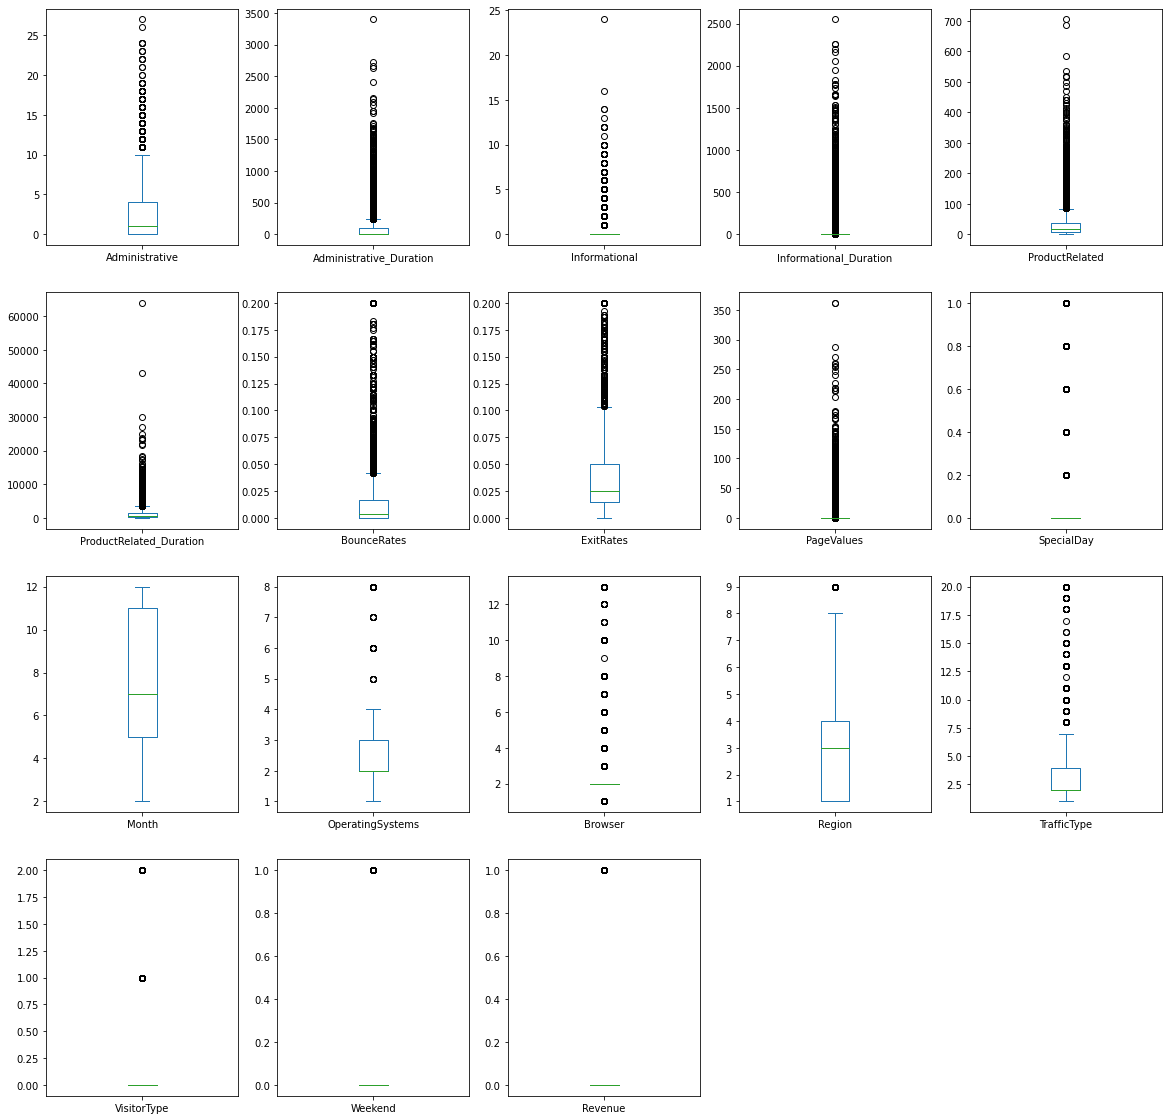


 dataset_filtered hist: 



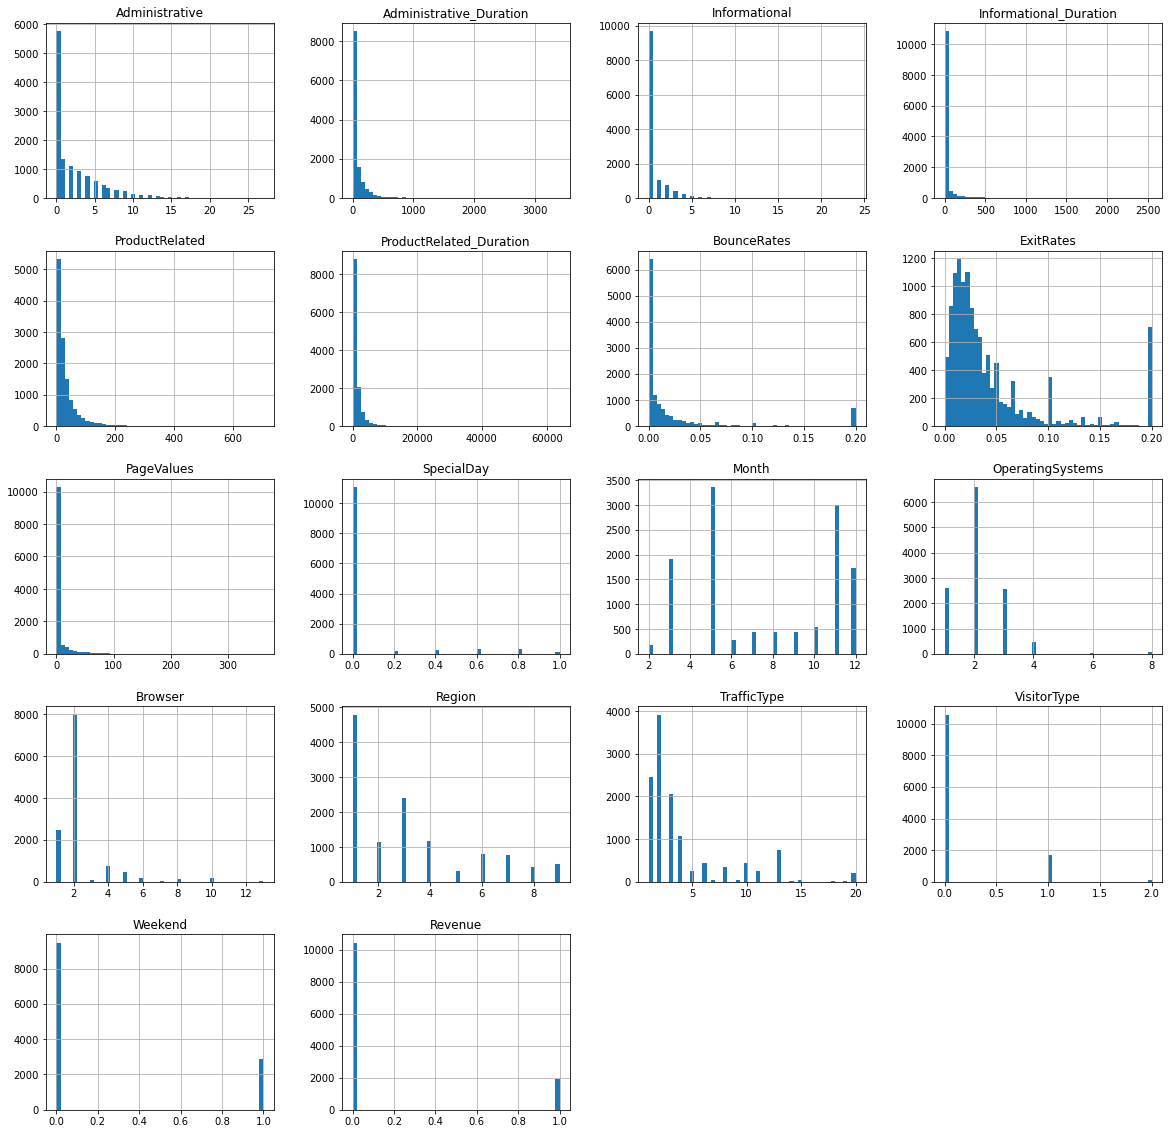

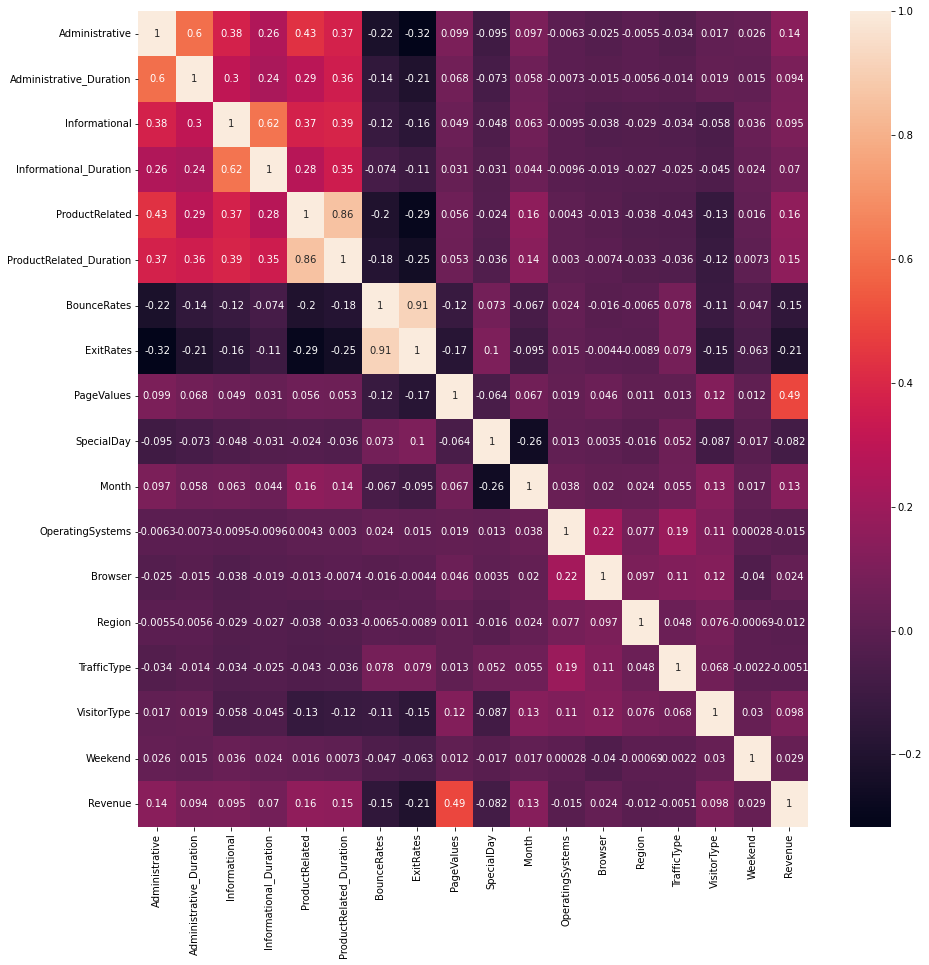

In [4]:
# For a statistical summary: describe
# This provides information such as mean, count, avg, max, min etc.
print(str(dataset_encoded.describe()))

# To visualise univariate(plots of individual variables) plots: box and whisker plots
# For better idea of variable distribution
print("\n plot: \n")
dataset_encoded.plot(kind='box', subplots=True, layout=(4, 5), figsize=(20,20), sharex=False, sharey=False)
plt.show()


# To visualise as a histogram: hist
print("\n dataset_filtered hist: \n")
dataset_encoded.hist(bins=50, figsize=(20,20))
plt.show()

# To visualise multivariate(plots of individual variables) plots: scatter plot matrix
#print("\n scatter_matrix: \n")
#scatter_matrix(frame=dataset_filtered,figsize=(40,40))
#plt.show()

#Correlation matrix
corrMatrix = dataset_encoded.corr()
#mask = numpy.zeros_like(corrMatrix)
#mask[numpy.triu_indices_from(mask)] = True
#print (corrMatrix)

plt.figure(figsize=(15, 15))
#sn.heatmap(corrMatrix, annot=True, mask=mask)
sn.heatmap(corrMatrix, annot=True)
plt.show()



#  Filter outliners

# Filter outliners: Use lower quantile 0.05 and higher quantile 0.95 

In [5]:
q_low = dataset_encoded.quantile(0.05)
q_hi = dataset_encoded.quantile(0.95)
dataset_encoded_filtered = dataset_encoded[(dataset_encoded >= q_low) & (dataset_encoded <= q_hi)]

for column in dataset_encoded_filtered:
    print("\n column:", column, "data:", dataset_encoded_filtered[column].unique(), "Count NaN: ", dataset_encoded_filtered[column].isna().sum())
print(dataset_encoded_filtered.head())
print(dataset_encoded_filtered.tail())




 column: Administrative data: [ 0.  1.  2.  4. nan  3.  6.  5.  9.  8.  7.] Count NaN:  557

 column: Administrative_Duration data: [  0.         53.         64.6       ... 167.9107143 305.125
 150.3571429] Count NaN:  617

 column: Informational data: [ 0.  1.  2. nan  3.] Count NaN:  482

 column: Informational_Duration data: [  0.         120.          16.          94.          93.
  75.          19.          22.                  nan 153.
  48.5         51.           3.         144.         125.
 127.          84.          21.5        100.          64.
  47.          70.          14.33333333  24.          40.
 136.         116.          18.         155.5          9.
  60.          28.         142.          18.5         39.
   4.         132.          57.          14.         148.5
  71.          28.5         90.          15.         125.0952381
 103.         147.8666667   41.          53.         126.
  77.          54.          40.66666667  23.          29.5
  75.25       122.    

       Administrative  Administrative_Duration  Informational  \
12325             3.0                    145.0            0.0   
12326             0.0                      0.0            0.0   
12327             0.0                      0.0            0.0   
12328             4.0                     75.0            0.0   
12329             0.0                      0.0            0.0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
12325                     0.0            53.0              1783.791667   
12326                     0.0             5.0               465.750000   
12327                     0.0             6.0               184.250000   
12328                     0.0            15.0               346.000000   
12329                     0.0             3.0                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay  Month  \
12325     0.007143   0.029031   12.241717         0.0   12.0   
12326     0.000000   0.021333    0.0

# Filter outliners: Drop missing values rows

In [6]:
dataset_filtered = dataset_encoded_filtered.dropna()
for column in dataset_filtered:
    print("\n column:", column, "data:", dataset_filtered[column].unique(), "Count NaN: ", dataset_filtered[column].isna().sum())
print(dataset_filtered.head())

print("dataset r,c ", dataset.shape)
print("flitered dataset r,c ", dataset_filtered.shape)

print(dataset['Revenue'].value_counts())
print(dataset_filtered['Revenue'].value_counts())
#print("dataset Revenue ", dataset.shape)
#print("flitered dataset r,c ", dataset_filtered.shape)


 column: Administrative data: [0. 2. 9. 3. 1. 4. 5. 8. 7. 6.] Count NaN:  0

 column: Administrative_Duration data: [  0.          9.        111.5       ... 111.0833333 134.3333333
 100.5      ] Count NaN:  0

 column: Informational data: [0. 1. 2. 3.] Count NaN:  0

 column: Informational_Duration data: [  0.          48.5        144.         127.          84.
  21.5         64.          47.          24.          40.
 136.         116.          18.          60.          28.
  39.           4.          14.         148.5         28.5
  15.         125.0952381  103.          41.         126.
  54.          40.66666667  60.5         81.          70.
  30.          17.          88.          51.          76.5
  50.          13.          20.          26.         102.
 109.75        84.5         75.5         44.5         92.
  87.          63.          94.5         36.33333333  45.
 138.5         56.          29.          37.          62.
  17.66666667  80.5         35.          73.         

     Administrative  Administrative_Duration  Informational  \
185             0.0                      0.0            0.0   
186             2.0                      9.0            0.0   
188             9.0                    111.5            1.0   
190             0.0                      0.0            0.0   
192             3.0                     52.0            0.0   

     Informational_Duration  ProductRelated  ProductRelated_Duration  \
185                     0.0            20.0               927.450000   
186                     0.0            50.0               836.800000   
188                    48.5            49.0              1868.819697   
190                     0.0             2.0                 0.000000   
192                     0.0             9.0               319.000000   

     BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
185     0.011111   0.027249    8.000741         0.0    3.0               1.0   
186     0.000000   0.006340 

# NOTE: 60% [(1908 - 762)/1908] of revenue instances are filtered out here

# Filter outliners: Filtered data describe and plot  

       Administrative  Administrative_Duration  Informational  \
count     7536.000000              7536.000000    7536.000000   
mean         1.532378                40.727516       0.206874   
std          2.228431                67.671836       0.593761   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          0.000000                 0.000000       0.000000   
75%          3.000000                59.500000       0.000000   
max          9.000000               345.000000       3.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count             7536.000000     7536.000000              7536.000000   
mean                 5.885677       21.040605               752.676865   
std                 22.477332       20.771400               841.891815   
min                  0.000000        1.000000                 0.000000   
25%                  0.000000        6.00000

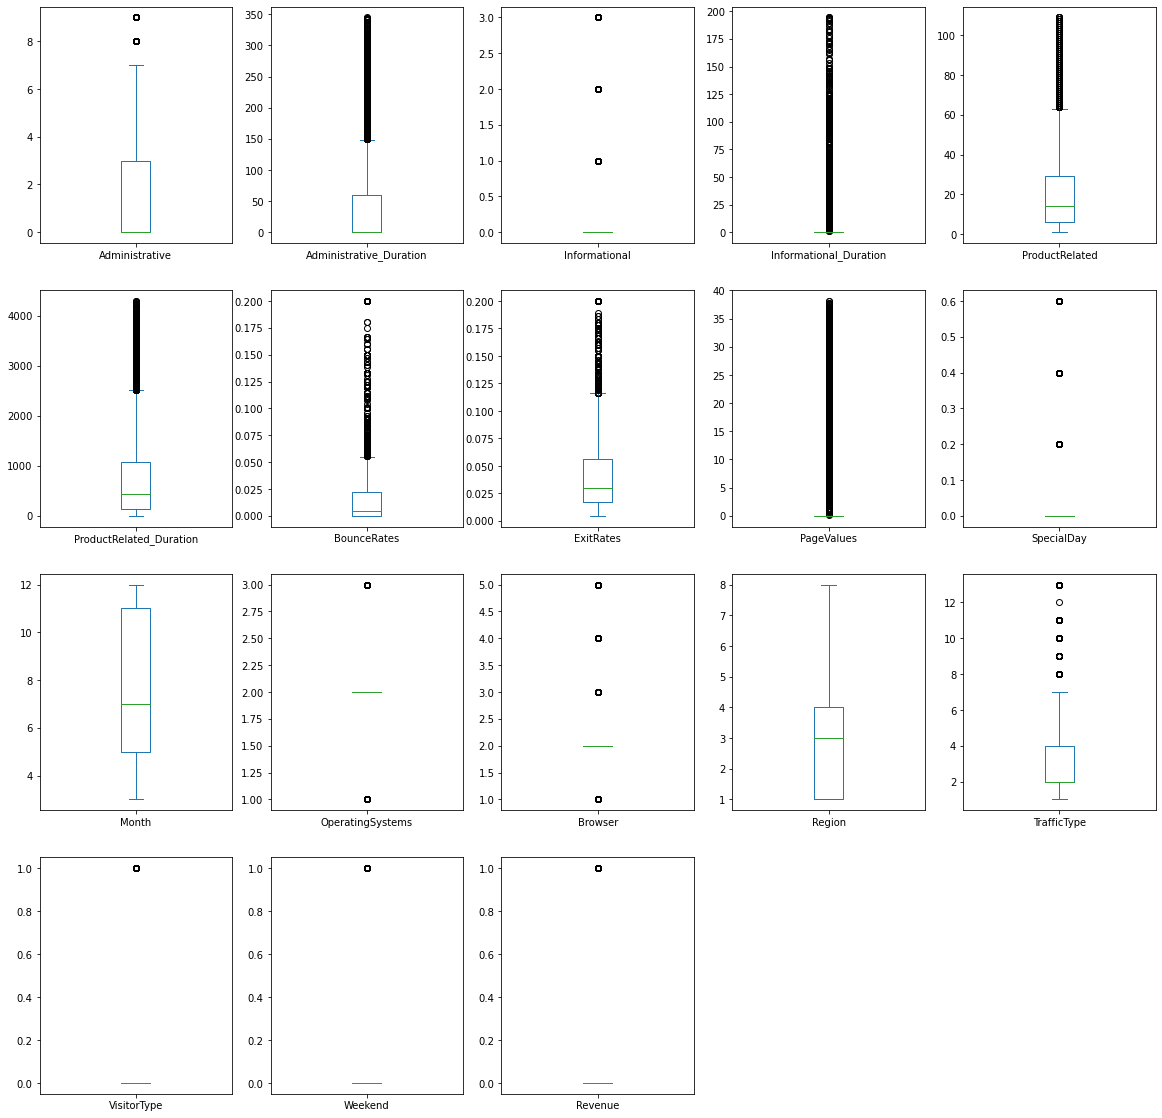

In [7]:
# For a statistical summary: describe
# This provides information such as mean, count, avg, max, min etc.
print(str(dataset_filtered.describe()))

# To visualise univariate(plots of individual variables) plots: box and whisker plots
# For better idea of variable distribution
print("\n plot: \n")
dataset_filtered.plot(kind='box', subplots=True, layout=(4, 5), figsize=(20,20), sharex=False, sharey=False)
plt.show()




# Filter outliners: Filtered data histogram and correlation


 dataset_filtered hist: 



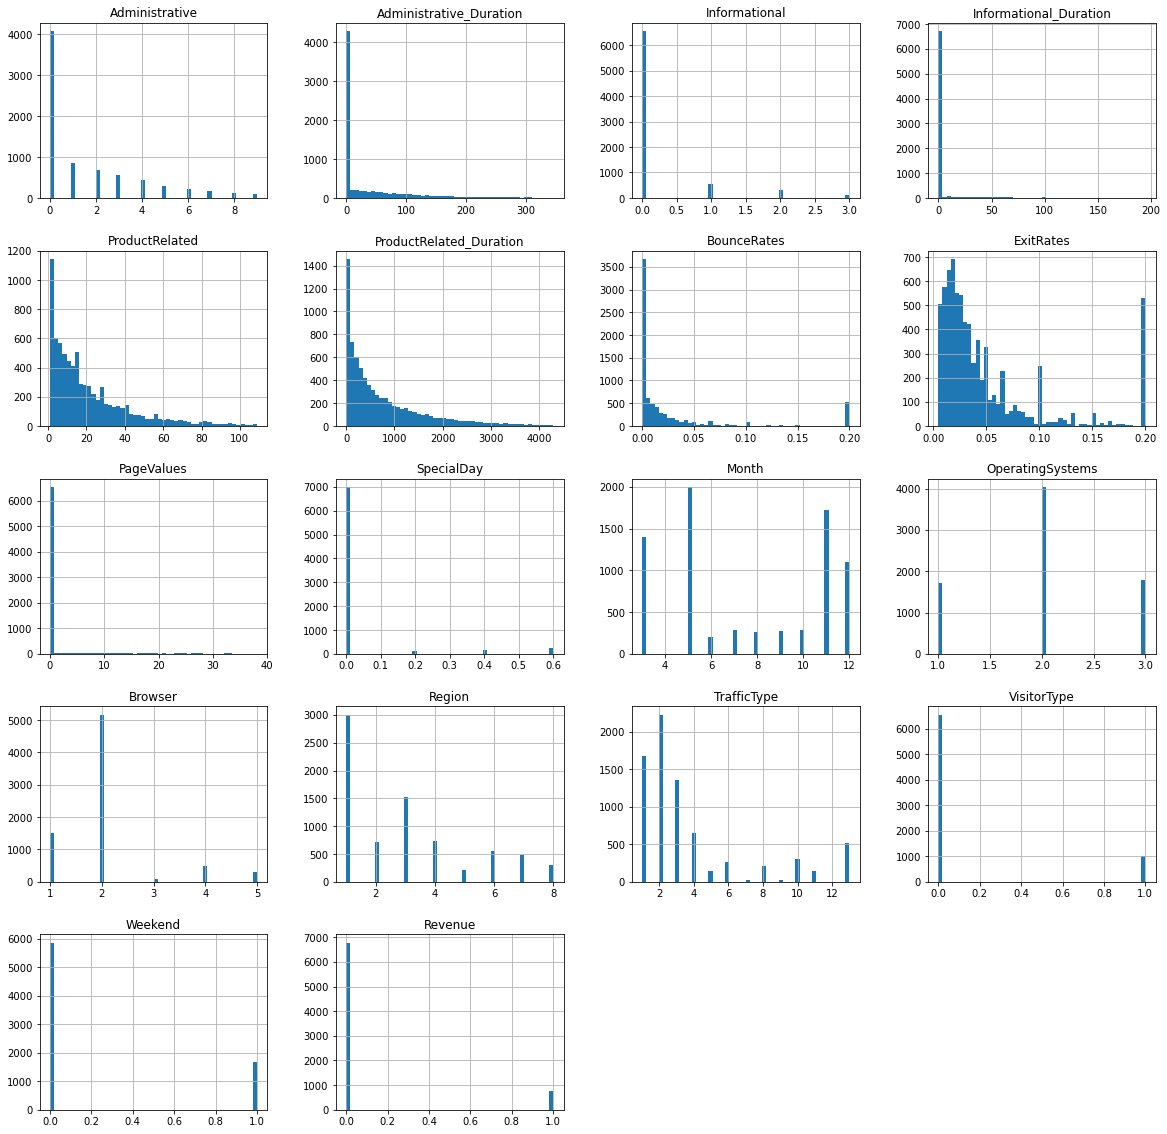

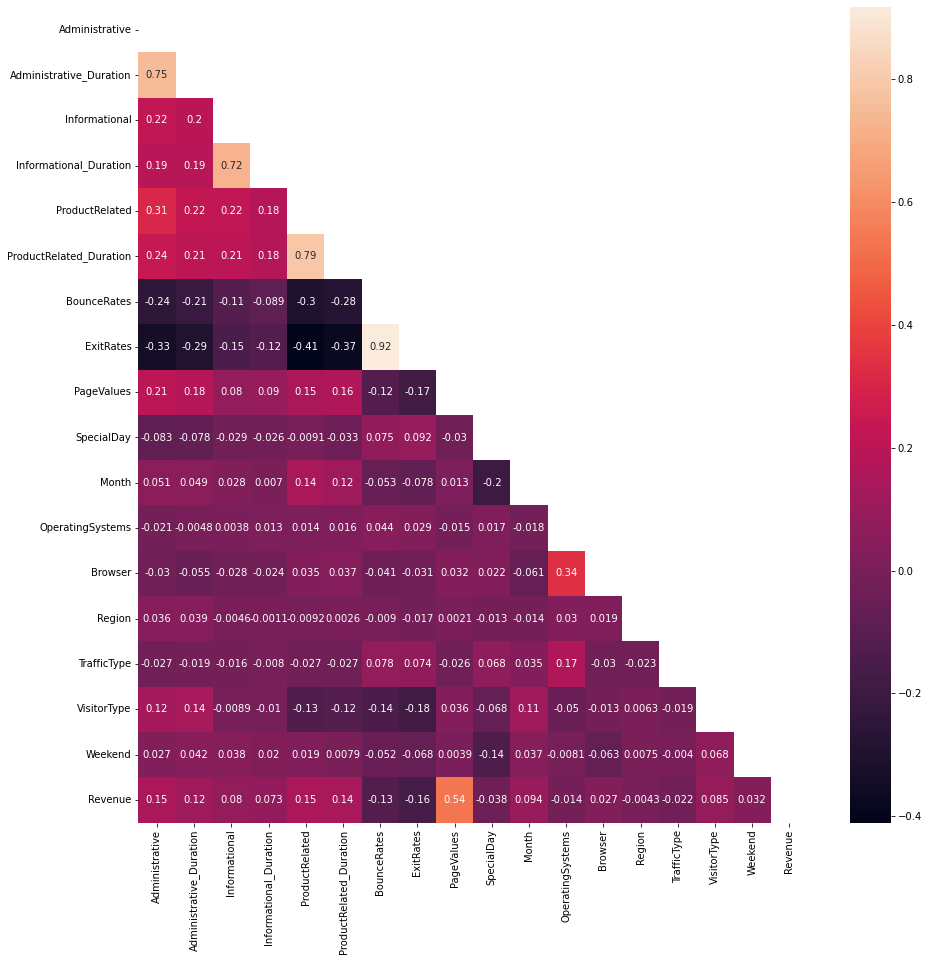

In [8]:
# To visualise as a histogram: hist
print("\n dataset_filtered hist: \n")
dataset_filtered.hist(bins=50, figsize=(20,20))
plt.show()

# To visualise multivariate(plots of individual variables) plots: scatter plot matrix
#print("\n scatter_matrix: \n")
#scatter_matrix(frame=dataset_filtered,figsize=(40,40))
#plt.show()

#Correlation matrix
corrMatrix = dataset_filtered.corr()
mask = numpy.zeros_like(corrMatrix)
mask[numpy.triu_indices_from(mask)] = True
#print (corrMatrix)
plt.figure(figsize=(15, 15))
sn.heatmap(corrMatrix, annot=True, mask=mask)
plt.show()


#print(str(corrMatrix.unstack().sort_values()))

# Data Scaling by StandardScaler and Visualization of scaled data

Scaled data frames
   Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931       -0.691003                -0.624348   
1               -0.244931       -0.668518                -0.590903   
2               -0.244931       -0.691003                -0.624348   
3               -0.244931       -0.668518                -0.622954   
4               -0.244931       -0.488636                -0.296430   

   BounceRates  ExitRates  PageValues  SpecialDay     Month  OperatingSystems  \
0     3.667189   3.229316   -0.317178   -0.308821 -1.665924         -1.233426   
1    -0.457683   1.171473   -0.

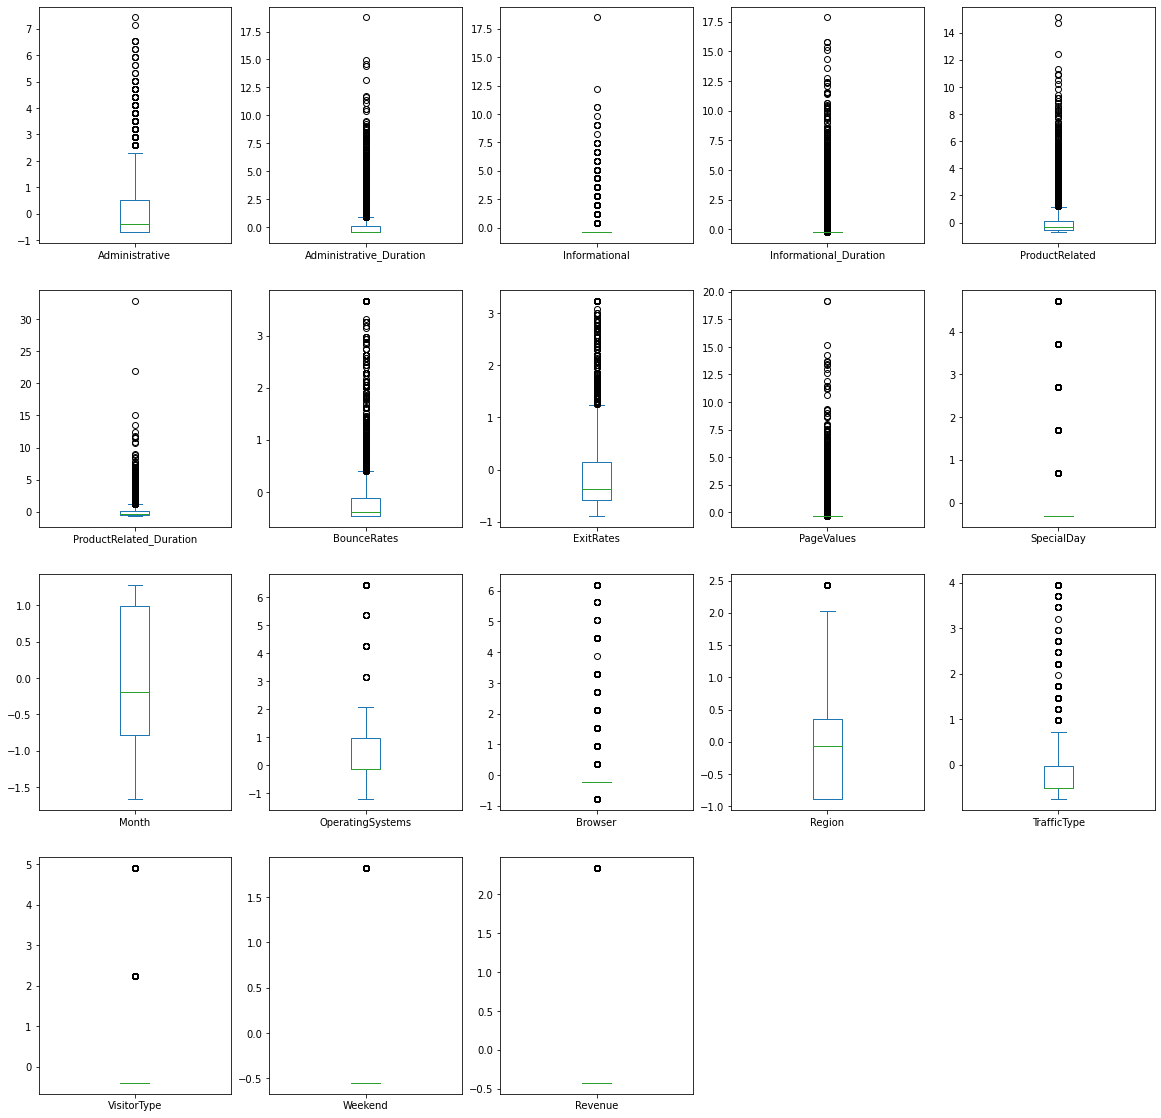


 hist: 



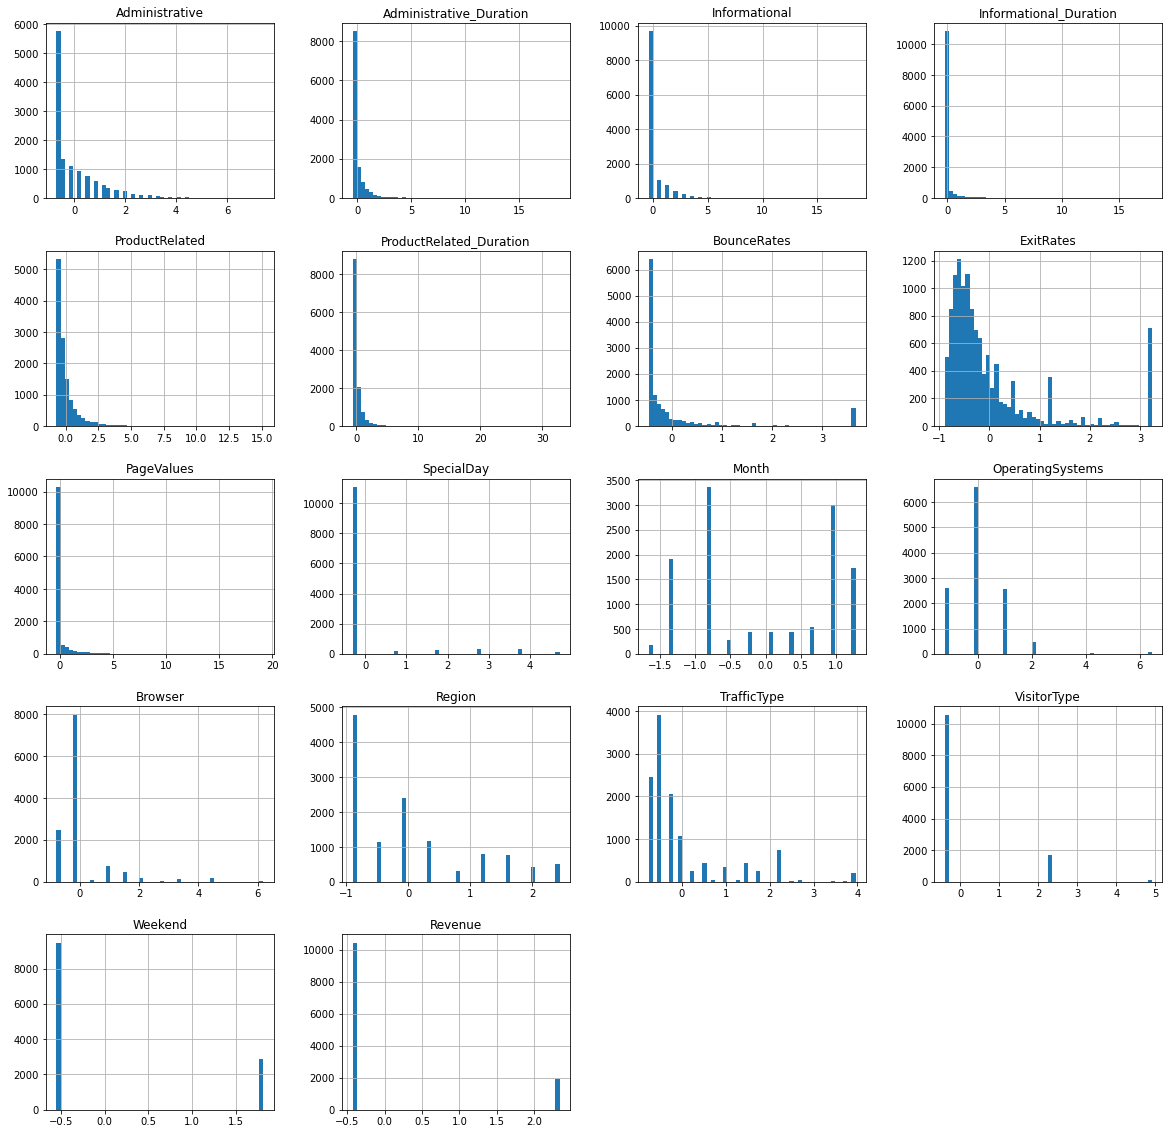

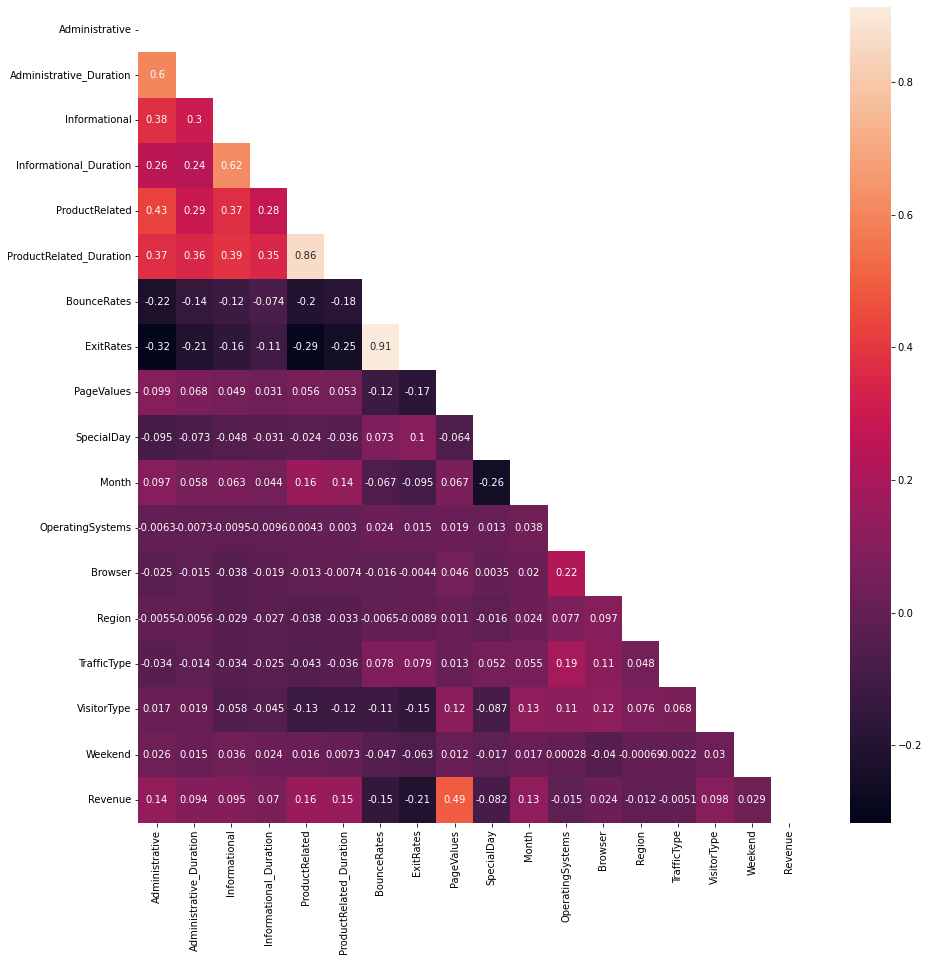

In [9]:
X = dataset_encoded.values
std_scaler = StandardScaler().fit(X)
X_scaled = std_scaler.transform(X)

#print(str(X_scaled[0:5, :]))
dataset_scaled = pandas.DataFrame(data=X_scaled, columns=dataset_encoded.columns)
print("Scaled data frames")
print(str(dataset_scaled.head()))
print(str(dataset_scaled.tail()))
# For a statistical summary: describe
# This provides information such as mean, count, avg, max, min etc.
print(str(dataset_scaled.describe()))



# To visualise univariate(plots of individual variables) plots: box and whisker plots
# For better idea of variable distribution
print("\n plot: \n")
dataset_scaled.plot(kind='box', subplots=True, layout=(4, 5), figsize=(20,20), sharex=False, sharey=False)
plt.show()

# To visualise as a histogram: hist
print("\n hist: \n")
dataset_scaled.hist(bins=50, figsize=(20,20))
plt.show()

# To visualise multivariate(plots of individual variables) plots: scatter plot matrix
#print("\n scatter_matrix: \n")
#scatter_matrix(frame=dataset_scaled,figsize=(20,20))
#plt.show()

#Correlation matrix
corrMatrix = dataset_scaled.corr()
mask = numpy.zeros_like(corrMatrix)
mask[numpy.triu_indices_from(mask)] = True
#print (corrMatrix)
plt.figure(figsize=(15, 15))
sn.heatmap(corrMatrix, annot=True, mask=mask)
plt.show()

# Conclusions:

# Lot of outliners

Just 0.05 and 0.95 quartile outliner removal filterd out 60% [(1908 - 762)/1908] of revenue instances  

Non filtered:
False    10422
True      1908
Name: Revenue, dtype: int64

Filtered:
0    6774
1     762
Name: Revenue, dtype: int64

# Scaling

StandardScaler normalized helped to deal with outliners

# Feedback from Evaluator: Use mean values for filtered out values. 
If one feature instance removed because of outlier, it impacts other features also. So may mean value is better way? 

# Fill outliner with mean values


In [17]:
wo_rev_features[:, 0:17] = dataset_encoded[:, 0:17]

q_low = wo_rev_features.quantile(0.25)
q_hi = wo_rev_features.quantile(0.75)
iqr = 1.5*(q_hi - q_low)
q_low_iqr = q_low - iqr
q_high_iqr = q_hi + iqr

wo_rev_features = wo_rev_features[(wo_rev_features >= q_low_iqr) & (wo_rev_features <= q_high_iqr)]



TypeError: '(slice(None, None, None), slice(0, 17, None))' is an invalid key

# Filter outliners: Fill missing values rows with means

In [15]:
wo_rev_features_filled = wo_rev_features.fillna(wo_rev_features.mean())
rev_features_filled['Revenue'] = dataset_encoded[:, 17]

for column in rev_features_filled:
    print("\n column:", column, "data:", rev_features_filled[column].unique(), "Count NaN: ", rev_features_filled[column].isna().sum())
print(rev_features_filled.head())

print("dataset r,c ", dataset.shape)
print("flitered dataset r,c ", rev_features_filled.shape)

print(dataset['Revenue'].value_counts())
print(rev_features_filled['Revenue'].value_counts())
#print("dataset Revenue ", dataset.shape)

NameError: name 'wo_rev_features' is not defined

# Data visualization outliner field with mean values

Scaled data frames
   Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                      0.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                 0.000000   
1                     0.0             2.0                64.000000   
2                     0.0             1.0                 0.000000   
3                     0.0             2.0                 2.666667   
4                     0.0            10.0               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0          NaN        NaN         0.0         0.0    2.0               1.0   
1         0.00       0.10         0.0

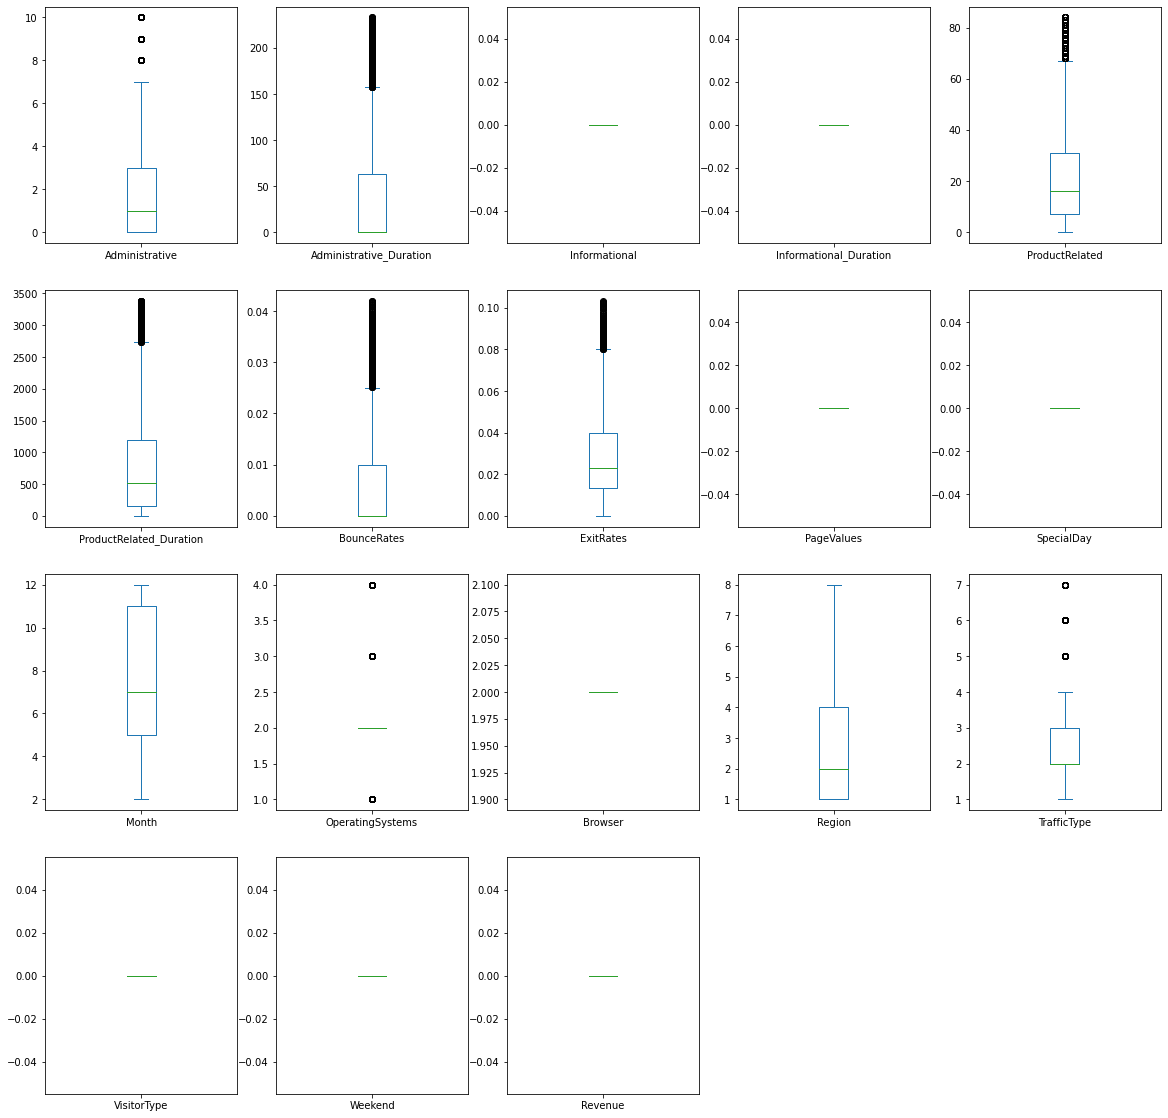


 hist: 



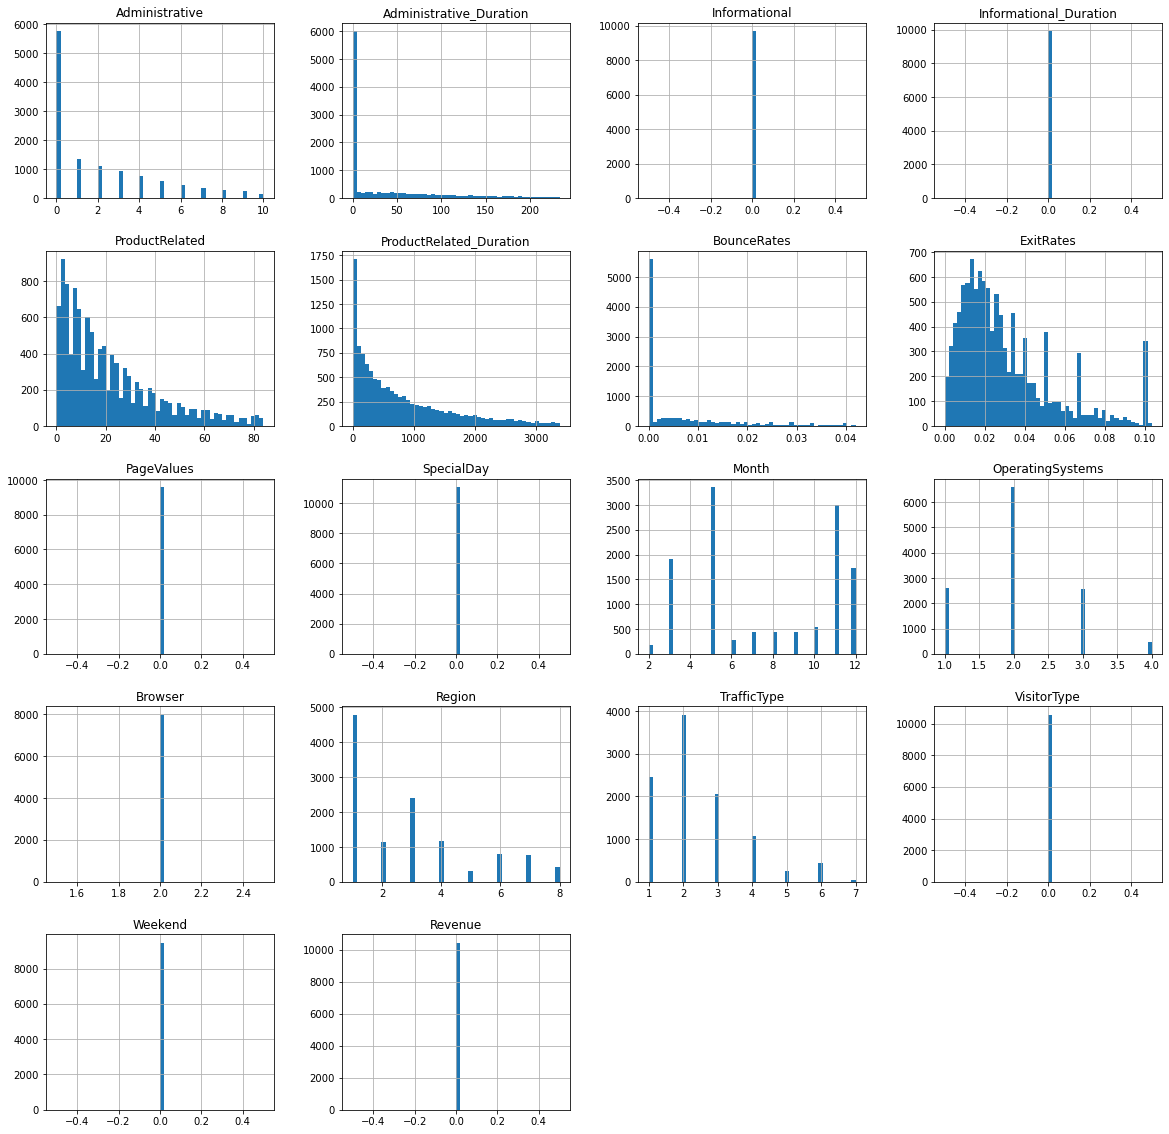

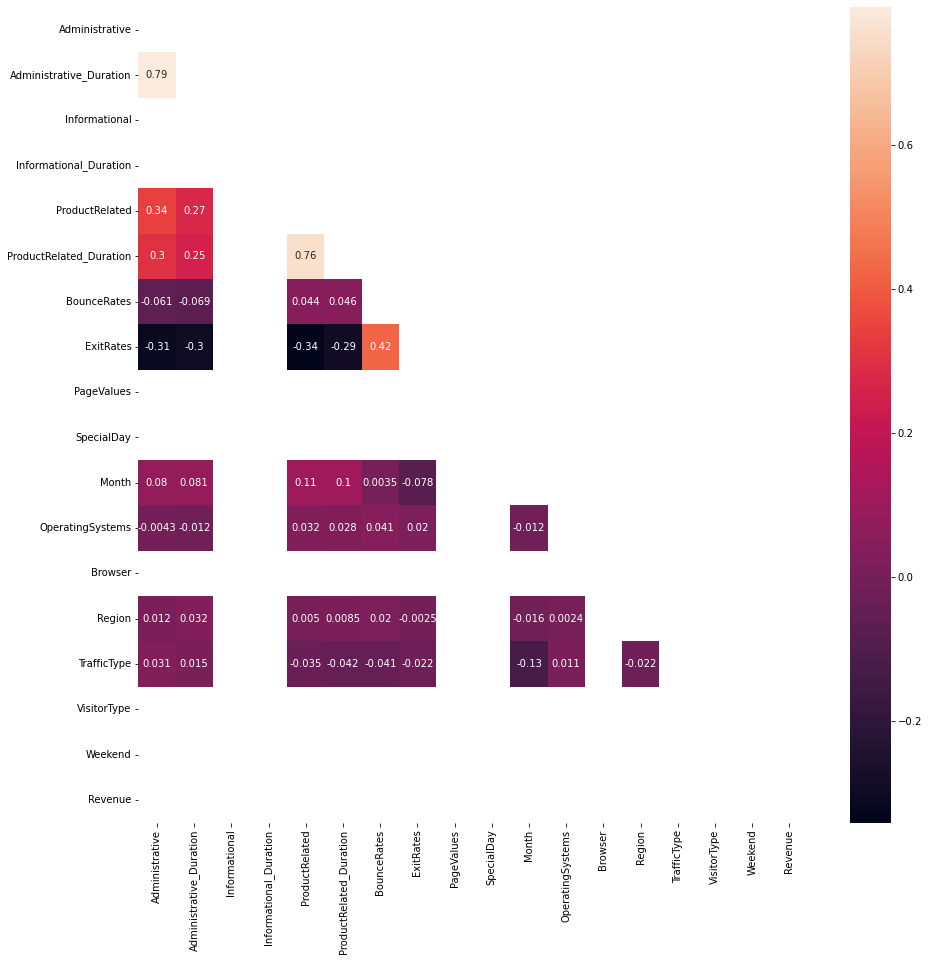

In [13]:
X = dataset_iqr_filtered.values
#std_scaler = StandardScaler().fit(X)
#X_scaled = std_scaler.transform(X)

#print(str(X_scaled[0:5, :]))
dataset_scaled = pandas.DataFrame(data=X, columns=dataset_iqr_filtered.columns)
print("Scaled data frames")
print(str(dataset_scaled.head()))
print(str(dataset_scaled.tail()))
# For a statistical summary: describe
# This provides information such as mean, count, avg, max, min etc.
print(str(dataset_scaled.describe()))



# To visualise univariate(plots of individual variables) plots: box and whisker plots
# For better idea of variable distribution
print("\n plot: \n")
dataset_scaled.plot(kind='box', subplots=True, layout=(4, 5), figsize=(20,20), sharex=False, sharey=False)
plt.show()

# To visualise as a histogram: hist
print("\n hist: \n")
dataset_scaled.hist(bins=50, figsize=(20,20))
plt.show()

# To visualise multivariate(plots of individual variables) plots: scatter plot matrix
#print("\n scatter_matrix: \n")
#scatter_matrix(frame=dataset_scaled,figsize=(20,20))
#plt.show()

#Correlation matrix
corrMatrix = dataset_scaled.corr()
mask = numpy.zeros_like(corrMatrix)
mask[numpy.triu_indices_from(mask)] = True
#print (corrMatrix)
plt.figure(figsize=(15, 15))
sn.heatmap(corrMatrix, annot=True, mask=mask)
plt.show()

# IGNORE: Rough sheets

# Filter out Zero page value and Data visualization

False    10422
True      1908
Name: Revenue, dtype: int64
1    531
0    465
Name: Revenue, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 185 to 12319
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           996 non-null    float64
 1   Administrative_Duration  996 non-null    float64
 2   Informational            996 non-null    float64
 3   Informational_Duration   996 non-null    float64
 4   ProductRelated           996 non-null    float64
 5   ProductRelated_Duration  996 non-null    float64
 6   BounceRates              996 non-null    float64
 7   ExitRates                996 non-null    float64
 8   PageValues               996 non-null    float64
 9   SpecialDay               996 non-null    float64
 10  Month                    996 non-null    float64
 11  OperatingSystems         996 non-null    float64
 12  Browser                  9

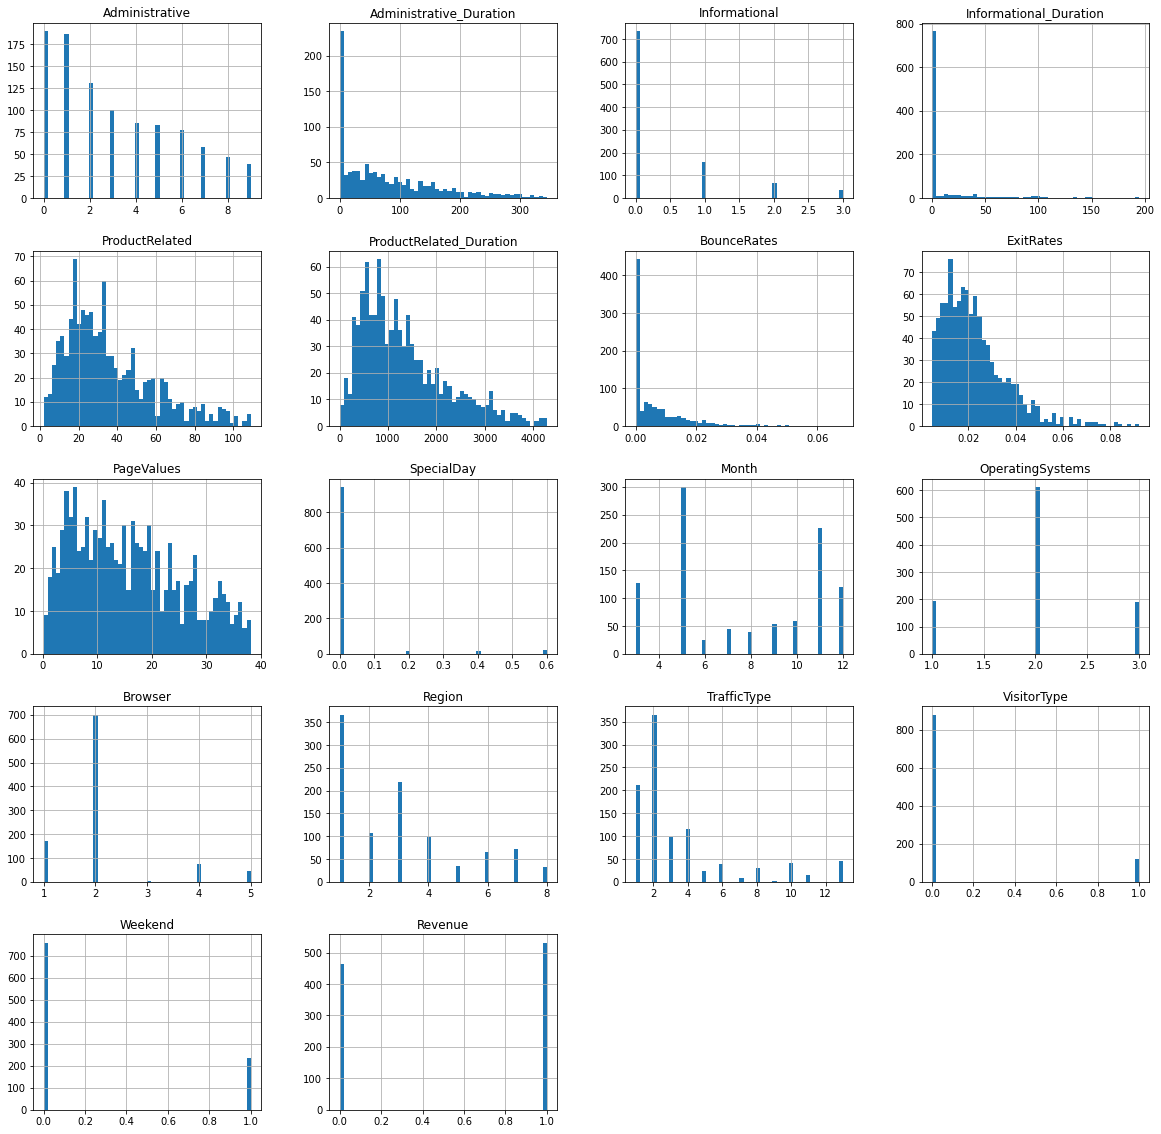

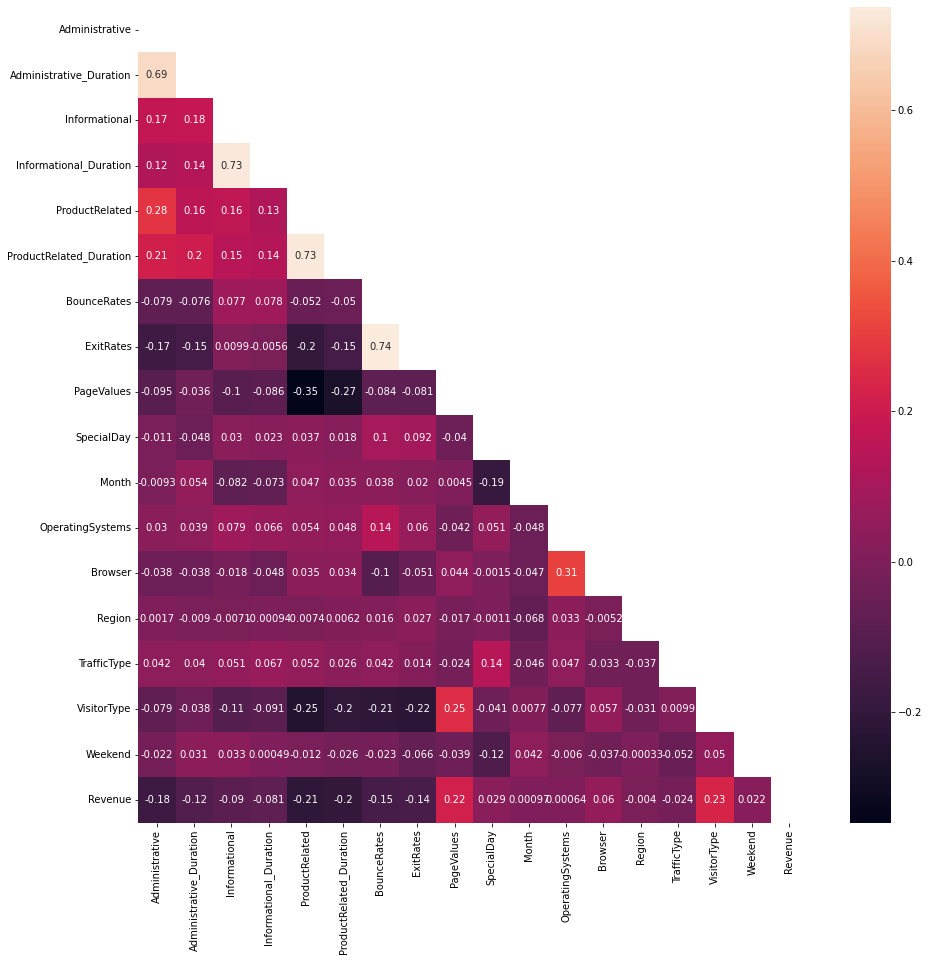

In [10]:
#print(str(dataset_filtered['PageValues'].unique()))
print(str(dataset['Revenue'].value_counts()))
dataset_non_zero_value_page = dataset_filtered.loc[dataset_encoded['PageValues'] != 0]
print(str(dataset_non_zero_value_page['Revenue'].value_counts()))
print(dataset_non_zero_value_page.info())
# To visualise as a histogram: hist
print("\n hist: \n")
dataset_non_zero_value_page.hist(bins=50, figsize=(20,20))
plt.show()

# To visualise multivariate(plots of individual variables) plots: scatter plot matrix
#print("\n scatter_matrix: \n")
#scatter_matrix(frame=dataset_non_zero_value_page,figsize=(40,40))
#plt.show()

#Correlation matrix
corrMatrix = dataset_non_zero_value_page.corr()
mask = numpy.zeros_like(corrMatrix)
mask[numpy.triu_indices_from(mask)] = True
#print (corrMatrix)

plt.figure(figsize=(15, 15))
sn.heatmap(corrMatrix, annot=True, mask=mask)
plt.show()